In [144]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.interpolate import interp1d
import pandas as pd

Getting Dl/l data from CTE and pure Dl/l

Some data is given in the form of polynomials that are to be expanded
This is covered in the start of the file

Some data is given in csv format o.e.
The latter data reads CTE data straight from the csv and turns it into Dl/l for comparison

In [145]:
def cte_expand_power(a, b, c, d, e, f, g, h, i, temp):
    power_int = np.array([a, b, c, d, e, f, g, h, i])
    T = np.array(temp)
    l = np.log10(T)
    power = np.zeros(len(T))
    for p, i in enumerate(power_int):
        power += i * 1e-6 * l**p

    #print(power)

    return 10**power

def cte_expand(a, b, c, d, e, f, g, h, i, temp):
    power_int = np.array([a, b, c, d, e, f, g, h, i])
    T = np.array(temp)
    power = np.zeros(len(T))
    for p, a in enumerate(power_int):
        #print('p: ', p, '. a_i: ', a)
        power += a * (T)**p

    #print(power)

    return power

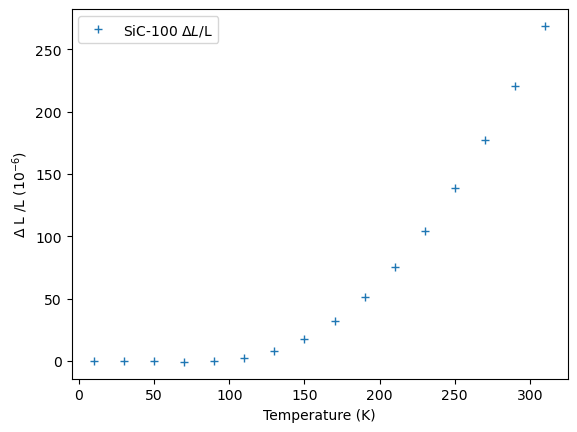

In [146]:
#Plot Dl/L from polynomial coefficients
#the form sum of a_i * T^i
#plottings params: temps, cteSiC

T = np.linspace(10, 310, 16)
#cte SiC
cteSiC = cte_expand(-2.27874e2, -2.0469e-2, 1.86617e-3, -6.11583e-5, 7.15903e-7, -3.40606e-9, 8.84326e-12, -1.24822e-14, 7.54250e-18, T)
cteSiC0 = cte_expand(0, -2.0469e-2, 1.86617e-3, -6.11583e-5, 7.15903e-7, -3.40606e-9, 8.84326e-12, -1.24822e-14, 7.54250e-18, T)
plt.plot(T, cteSiC0, '+')
plt.ylabel(r'$\Delta$ L /L ($10^{-6}$)')
plt.xlabel('Temperature (K)')
plt.legend([r'SiC-100 $\Delta L$/L'])
plt.show()

In [147]:
# Load the CSV file with proper parsing
def csv2cte(filepath):
    data = pd.read_csv(filepath, skiprows=1, delim_whitespace=True)

    # Extract relevant columns
    split_data = data.iloc[:, 0].str.split(',', expand=True)

    # Extract the relevant columns
    temperatureStr = split_data[0].values
    valueStr = split_data[2].values

    #convert to float
    temperature = temperatureStr.astype(float)
    value = valueStr.astype(float)

    return temperature, value

In [148]:
copper_cte = csv2cte('copper.csv')
silicon_cte = csv2cte('silicon.csv')

/tmp/ipykernel_6490/3425989425.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(filepath, skiprows=1, delim_whitespace=True)
/tmp/ipykernel_6490/3425989425.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(filepath, skiprows=1, delim_whitespace=True)


Text(0, 0.5, 'CTE (1/K)')

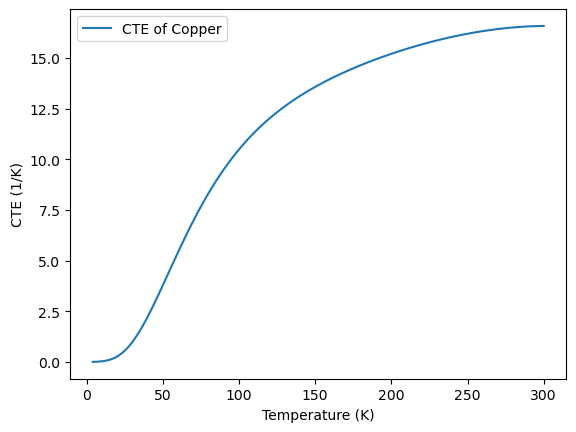

In [149]:
np.array(copper_cte[1])
np.array(copper_cte[0])
plt.plot(copper_cte[0], copper_cte[1], label='CTE of Copper')
plt.legend()
plt.xlabel('Temperature (K)')
plt.ylabel('CTE (1/K)')

In [150]:
#function to convert CTE data to Dl/l
def lengthChangeWithTemp(material, cte_data, initL, startT, endT):
    #print(cte_data)
    temp = np.array(cte_data[0])
    cte = np.array(cte_data[1])

    #interpolate the cte data
    cte_interpolated = interp1d(temp, cte, kind='linear', fill_value="extrapolate")
    temps = np.linspace(endT, startT, 1000)
    cte_int = cte_interpolated(temps)

    #change in length
    DeltaL = initL * np.trapz(cte_int, temps)

    finalL = initL - DeltaL

    return finalL, cte_int, temps

Text(0, 0.5, '$\\Delta L/L$ ($10^{-6}$)')

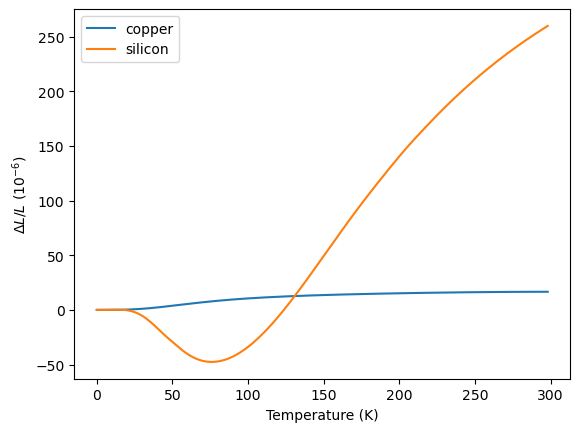

In [151]:
length = 10 #mm
startT = 298 #K
endT = 0.1 #K

results = []

materials = {'copper': copper_cte, 'silicon': silicon_cte}
for material, data in materials.items():
    finalL, cte, temps = lengthChangeWithTemp(material, data, length, startT, endT)
    plt.plot(temps, cte)
    #print(material, ': ', finalL, '. : ', 100-finalL/length*100)
    results.append([material, finalL])
plt.legend(materials.keys())
plt.xlabel('Temperature (K)')
plt.ylabel(r'$\Delta L/L$ ($10^{-6}$)')

Text(0.5, 1.0, 'Comparison of SiC and Pure Silicon length changes')

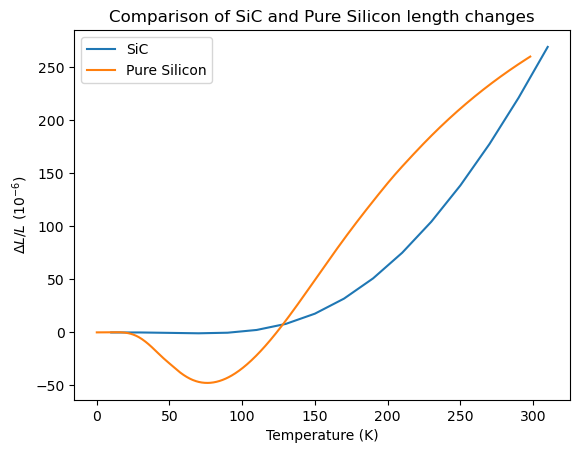

In [152]:
#plot the results together
#new fig
plt.figure()
plt.plot(T, cteSiC0, label='SiC')
plt.plot(temps, cte, label='Pure Silicon')
plt.xlabel('Temperature (K)')
plt.ylabel(r'$\Delta L /L$ ($10^{-6}$)')
plt.legend()
plt.title('Comparison of SiC and Pure Silicon length changes')

1000


Text(0.5, 1.0, 'Difference in length change per unit length between SiC and Pure Silicon')

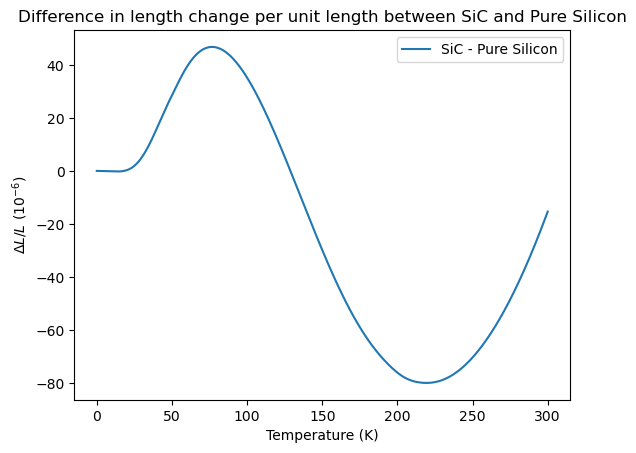

In [153]:
#plot the difference
length = len(cte)
print(length)
Tl = np.linspace(0, 300, length)
#cte SiC
cteSiC0 = cte_expand(0, -2.0469e-2, 1.86617e-3, -6.11583e-5, 7.15903e-7, -3.40606e-9, 8.84326e-12, -1.24822e-14, 7.54250e-18, Tl)
plt.plot(Tl, cteSiC0-cte, label='SiC - Pure Silicon')
plt.xlabel('Temperature (K)')
plt.ylabel(r'$\Delta L/L$ ($10^{-6}$)')
plt.legend()
plt.title('Difference in length change per unit length between SiC and Pure Silicon')
